# Logistic Regression

## Perceptron Trick Code 

In [16]:
from sklearn.datasets import make_classification

import numpy as np 

X, y = make_classification(n_samples= 300, n_features = 2, n_informative= 1, 
                          n_redundant = 0, n_classes= 2, n_clusters_per_class =1,
                           random_state= 43, hypercube= False, class_sep= 20
                          )

In [17]:
import matplotlib.pyplot as plt

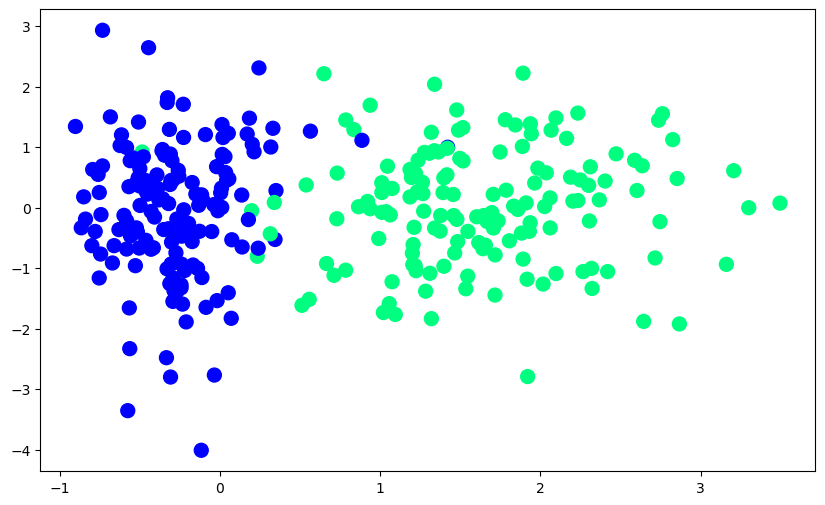

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y,cmap='winter', s= 100);

In [22]:
def perceptron(X, y):
    
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0], weights[1:]
        

In [23]:
def step(z):
    return 1 if z>0 else 0 

In [24]:
intercept_, coef_ = perceptron(X, y)

In [25]:
print(intercept_) 
print(coef_ )

-0.09999999999999992
[0.5393929  0.02139619]


In [26]:
m = -(coef_[0]/ coef_[1])
b = -(intercept_/ coef_[1])

In [27]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

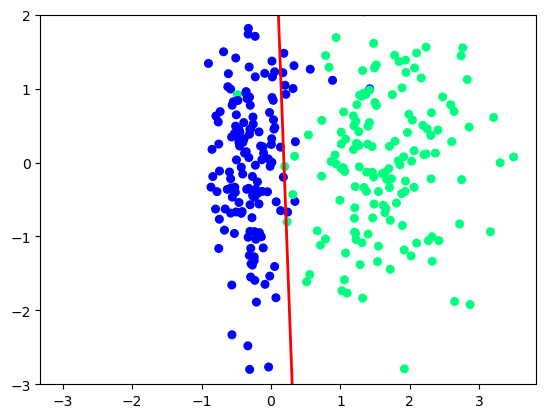

In [34]:
plt.plot(x_input, y_input, color = 'red', linewidth = 2)
plt.scatter(X[:,0], X[:,1], c= y, cmap='winter',s = 30)
plt.ylim(-3,2)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lor = LogisticRegression()
lor.fit(X, y)

LogisticRegression()

In [39]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [40]:
x_input1 = np.linspace(-3, 3, 100)
y_input1 = m*x_input + b

(-3.0, 2.0)

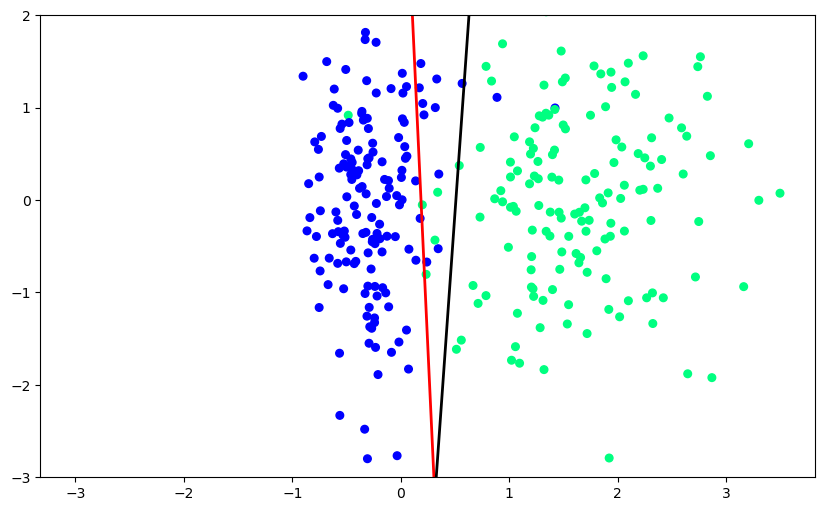

In [41]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color = 'red', linewidth = 2)
plt.plot(x_input1, y_input1, color = 'black', linewidth = 2)
plt.scatter(X[:,0], X[:,1], c= y, cmap='winter',s = 30)
plt.ylim(-3,2)

In [42]:
def perceptron(X, y):
    
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0], weights[1:]
        

In [43]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [44]:
intercept_, coef_ = perceptron(X, y)

In [45]:
print(intercept_) 
print(coef_ )

-1.5261589761198389
[4.23541672 0.45226417]


In [46]:
m = -(coef_[0]/ coef_[1])
b = -(intercept_/ coef_[1])

In [47]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

(-3.0, 2.0)

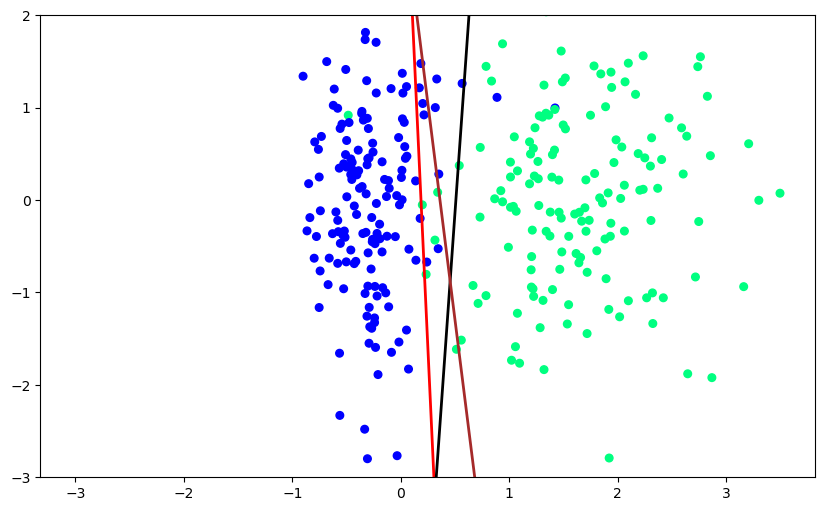

In [48]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color = 'red', linewidth = 2)
plt.plot(x_input1, y_input1, color = 'black', linewidth = 2)
plt.plot(x_input2, y_input2, color = 'brown', linewidth = 2)
plt.scatter(X[:,0], X[:,1], c= y, cmap='winter',s = 30)
plt.ylim(-3,2)

## Gradient Descent

In [5]:
from sklearn.datasets import make_classification

import numpy as np 

X, y = make_classification(n_samples= 300, n_features = 2, n_informative= 1, 
                          n_redundant = 0, n_classes= 2, n_clusters_per_class =1,
                           random_state= 43, hypercube= False, class_sep= 30
                          )

In [6]:
import matplotlib.pyplot as plt

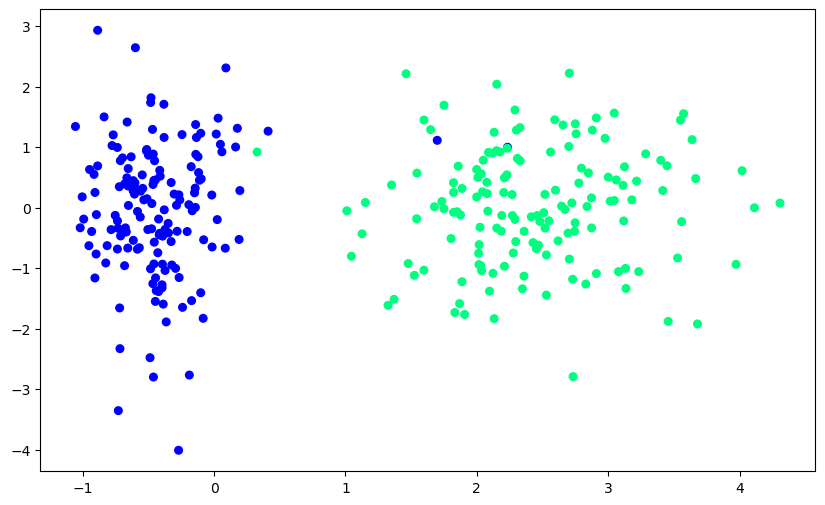

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y,cmap='winter', s= 30);

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty= 'none', solver= 'sag')
model.fit(X, y)

C:\Users\ASAD-AYUB\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [9]:
print(model.intercept_) 
print(model.coef_ )

[-3.65224841]
[[ 4.24898637 -0.55993566]]


In [11]:
m1 = -(model.coef_[0][0]/ model.coef_[0][1])
b1 = -(model.intercept_/ model.coef_[0][1])

In [21]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m1*x_input + b1

In [14]:
def gd(X, y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr= 0.5
    
    for i in range(3000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]

In [15]:
def sigmoid(z):
    return 1/(1 +np.exp(-z))

In [16]:
coef_, intercept_ = gd(X,y)

In [17]:
m = -(coef_[0]/ coef_[1])
b = -(intercept_/ coef_[1])

In [18]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

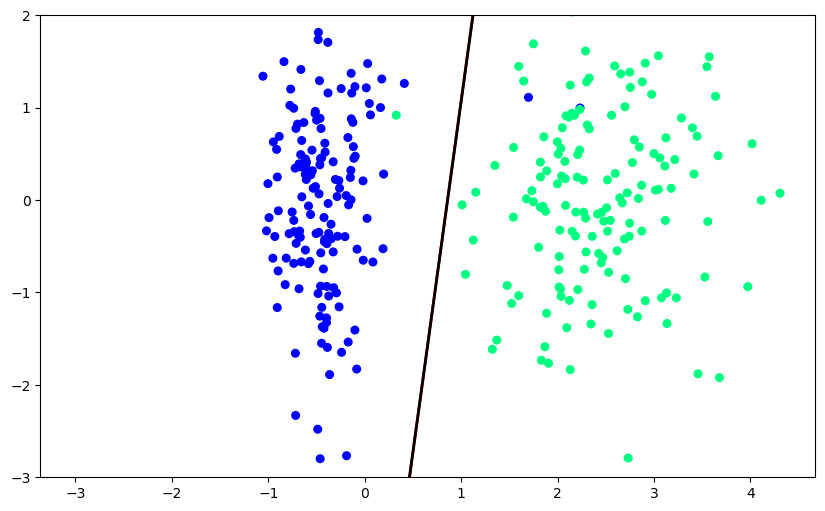

In [22]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color = 'red', linewidth = 2)
plt.plot(x_input1, y_input1, color = 'black', linewidth = 2)

plt.scatter(X[:,0], X[:,1], c= y, cmap='winter',s = 30)
plt.ylim(-3,2)

## Multinomial Logistic Regression or Softmax Regression

In [3]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
df = sns.load_dataset('iris')

In [5]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df = df[['sepal_length', 'petal_length', 'species']]
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [9]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 3)


In [15]:
model = LogisticRegression(multi_class='multinomial')

In [16]:
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [17]:
y_pred = model.predict(X_test)

In [18]:
print(accuracy_score(y_test, y_pred))

0.9333333333333333


In [19]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2
0,17,0,0
1,0,12,2
2,0,1,13


In [20]:
#prediction

qurey = np.array([[3.4, 2.7]])
model.predict_proba(qurey)

C:\Users\ASAD-AYUB\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.90667379e-01, 2.08961318e-01, 3.71302369e-04]])

In [21]:
model.predict(qurey)

C:\Users\ASAD-AYUB\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

C:\Users\ASAD-AYUB\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

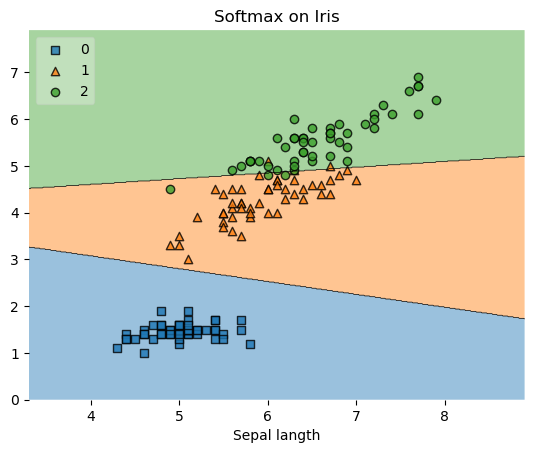

In [24]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values, model, legend = 2)

#Adding axes annotation

plt.xlabel('Sepal langth')
plt.title('Softmax on Iris')
plt.show

## Non Linear Logistic Regression 

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('ushape.csv')

In [29]:
df = df.rename(columns={'3.159499363321345566e-02': 'X', '9.869877579082642072e-01': 'Y', '0.000000000000000000e+00': 'class'})
df

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0
...,...,...,...
94,1.699453,0.587720,1.0
95,0.218623,-0.652521,1.0
96,0.952914,-0.419766,1.0
97,-1.318500,0.423112,0.0


In [30]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

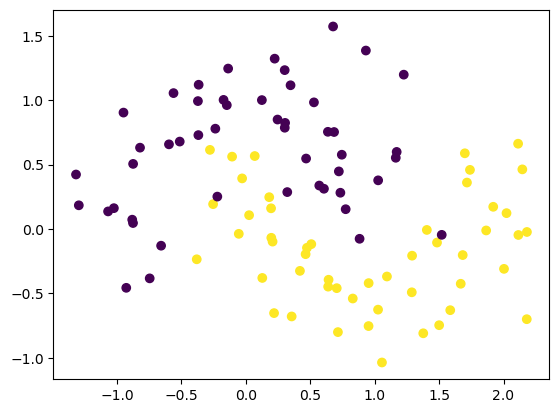

In [31]:
plt.scatter(X[:,0], X[:, 1], c=y);

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [34]:
model.fit(X,y)

LogisticRegression()

<Axes: >

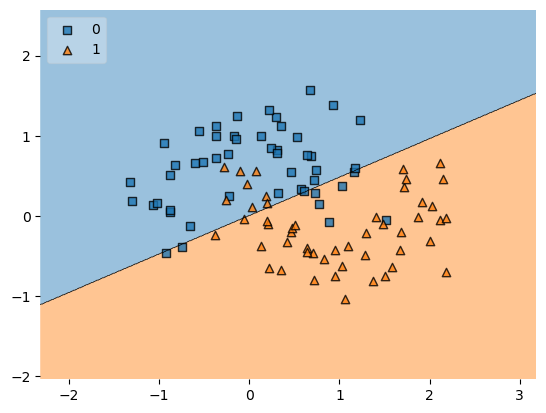

In [37]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y.astype('int'), model, legend = 2)


In [39]:

from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(model,X,y,scoring='accuracy',cv=10))

0.8300000000000001

In [41]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
X_trf = poly.fit_transform(X)

In [42]:
model1 = LogisticRegression()
np.mean(cross_val_score(model1,X_trf,y,scoring='accuracy',cv=10))

0.9099999999999999

In [43]:
def plot_decision_boundary(X,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))


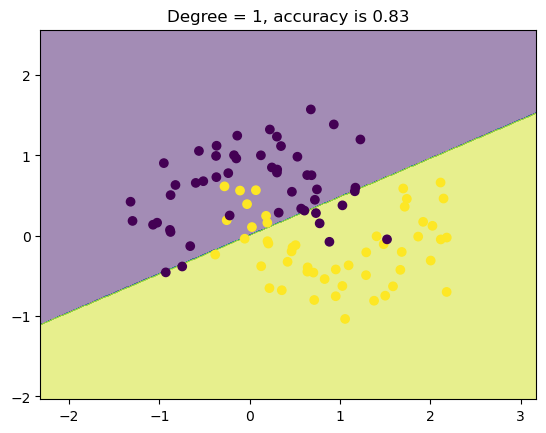

In [44]:
plot_decision_boundary(X,y)

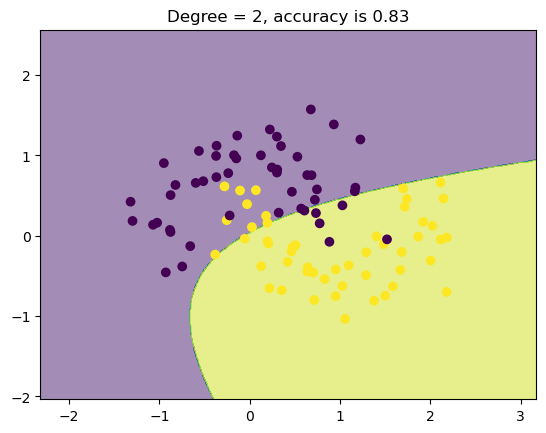

In [45]:
plot_decision_boundary(X,y,degree=2)

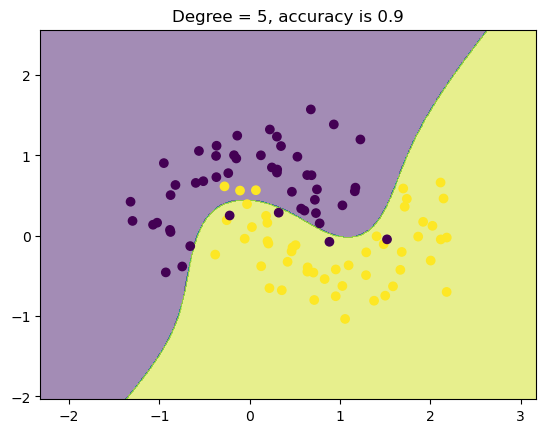

In [46]:
plot_decision_boundary(X,y,degree=5)